# APT Detection


In [1]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Extraction

Converting pcapng file in to a dataframe.

### NJRAT Traffic

#### Clean Traffic

In [4]:
from nfstream import NFStreamer
online_streamer = NFStreamer(source="/Users/asadtariq/Downloads/NJRat Traffic/Clean.pcapng")
# for flow in online_streamer:
#     print(flow) 
offline_streamer = NFStreamer(source="/Users/asadtariq/Downloads/NJRat Traffic/Clean.pcapng",
                              statistical_analysis=True,
                              splt_analysis=10)
df = offline_streamer.to_pandas(columns_to_anonymize=())
n_flows = offline_streamer.to_csv(flows_per_file=10000,
                                  columns_to_anonymize=())

#### Malicious Traffic

In [5]:
online_streamer = NFStreamer(source="/Users/asadtariq/Downloads/NJRat Traffic/Malicious.pcapng")
# for flow in online_streamer:
#     print(flow)  # print it.

offline_streamer = NFStreamer(source="/Users/asadtariq/Downloads/NJRat Traffic/Malicious.pcapng",
                              statistical_analysis=True,
                              splt_analysis=10)

df2 = offline_streamer.to_pandas(columns_to_anonymize=())
n_flows2 = offline_streamer.to_csv(flows_per_file=10000,
                                  columns_to_anonymize=())

### Caldera Traffic

#### Clean Traffic

In [6]:

online_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/clean.pcapng")

offline_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/clean.pcapng",
                              statistical_analysis=True,
                              splt_analysis=10)

df3 = offline_streamer.to_pandas(columns_to_anonymize=())
n_flows3 = offline_streamer.to_csv(flows_per_file=10000,
                                  columns_to_anonymize=())

In [7]:
online_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/clean2.pcapng")


offline_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/clean2.pcapng",
                              statistical_analysis=True,
                              splt_analysis=10)

df4 = offline_streamer.to_pandas(columns_to_anonymize=())
n_flows4 = offline_streamer.to_csv(flows_per_file=10000,
                                  columns_to_anonymize=())

#### Malicious Traffic

In [8]:

online_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/malicious.pcapng")

offline_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/malicious.pcapng",
                              statistical_analysis=True,
                              splt_analysis=10)

df5 = offline_streamer.to_pandas(columns_to_anonymize=())
n_flows5 = offline_streamer.to_csv(flows_per_file=10000,
                                  columns_to_anonymize=())

In [9]:

online_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/malicious2.pcapng")


offline_streamer = NFStreamer(source="/Users/asadtariq/Downloads/Traffic/Caldera Traffic/malicious2.pcapng",
                              statistical_analysis=True,
                              splt_analysis=10)

df6 = offline_streamer.to_pandas(columns_to_anonymize=())
n_flows6 = offline_streamer.to_csv(flows_per_file=10000,
                                  columns_to_anonymize=())

### Adding labels of clean and malicious traffice 
- Clean = 0 
- Malicious = 1

- Clean Traffic = df1,df3,df4
- Malicious Traffic = df2,df5,df6

In [10]:
df['label'] = 0
df3['label'] = 0
df4['label'] = 0
df2['label'] = 1
df5['label'] = 1
df6['label'] = 1

### Merging Cleand and Malicious traffics in to a single dataframe

In [11]:
df.shape,df2.shape,df3.shape,df4.shape,df5.shape,df6.shape

((3342, 90), (1515, 90), (321, 90), (1695, 90), (3274, 90), (475, 90))

In [12]:
traffic = pd.concat([df, df2,df3,df4,df5,df6],ignore_index=True)

### Saving merged dataframe as csv file

In [13]:
traffic.to_csv("/Users/asadtariq/Downloads/NJRat Traffic/Traffic.csv")

In [2]:
traffic= pd.read_csv("/Users/asadtariq/Downloads/NJRat Traffic/Traffic.csv")

In [15]:
data  = traffic

In [16]:
traffic

,Unnamed: 0,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label
0,0,0,0,13.107.6.158,00:50:56:fa:cc:4c,00:50:56,443,192.168.20.145,00:0c:29:0f:cf:f6,00:0c:29,...,TLS,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
1,1,1,0,204.79.197.222,00:50:56:fa:cc:4c,00:50:56,443,192.168.20.145,00:0c:29:0f:cf:f6,00:0c:29,...,TLS,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
2,2,2,0,192.168.20.145,00:0c:29:0f:cf:f6,00:0c:29,49722,94.97.232.235,00:50:56:fa:cc:4c,00:50:56,...,TLS,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
3,3,3,0,192.168.20.145,00:0c:29:0f:cf:f6,00:0c:29,61613,192.168.20.2,00:50:56:fa:cc:4c,00:50:56,...,DNS.Microsoft,Network,0,6,nav.smartscreen.microsoft.com,NaN,NaN,NaN,NaN,0
4,4,4,0,192.168.20.145,00:0c:29:0f:cf:f6,00:0c:29,49723,20.82.250.189,00:50:56:fa:cc:4c,00:50:56,...,TLS.Microsoft,Cloud,0,6,nav.smartscreen.microsoft.com,ce5f3254611a8c095a3d821d44539877,986571066668055ae9481cb84fda634a,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10617,10617,470,0,fe80::f9d6:c9e4:10c0:87ed,00:0c:29:1d:15:6c,00:0c:29,0,ff02::16,33:33:00:00:00:16,33:33:00,...,ICMPV6,Network,0,6,NaN,NaN,NaN,NaN,NaN,1
10618,10618,471,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,58446,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,...,HTTP,Web,0,6,192.168.126.139,NaN,NaN,Go-http-client/1.1,NaN,1
10619,10619,472,0,192.168.126.1,16:7d:da:ad:d3:65,16:7d:da,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,...,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN,1
10620,10620,473,0,fe80::147d:daff:fead:d365,16:7d:da:ad:d3:65,16:7d:da,5353,ff02::fb,33:33:00:00:00:fb,33:33:00,...,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN,1


## Feature Selection

We have total 89 columns, among these columns, we will drop the features that are either Identifiers(Ids), ports and mac addresses. These features do not contribute towards the classification of traffic.

In [17]:
data = traffic[['protocol', 'ip_version', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_duration_ms',
       'src2dst_packets', 'src2dst_bytes', 'dst2src_duration_ms',
       'dst2src_packets', 'dst2src_bytes', 'bidirectional_min_ps',
       'bidirectional_mean_ps', 'bidirectional_stddev_ps',
       'bidirectional_max_ps', 'src2dst_min_ps', 'src2dst_mean_ps',
       'src2dst_stddev_ps', 'src2dst_max_ps', 'dst2src_min_ps',
       'dst2src_mean_ps', 'dst2src_stddev_ps', 'dst2src_max_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms', 'dst2src_mean_piat_ms',
       'dst2src_stddev_piat_ms', 'dst2src_max_piat_ms',
       'bidirectional_syn_packets', 'bidirectional_cwr_packets',
       'bidirectional_ece_packets', 'bidirectional_urg_packets',
       'bidirectional_ack_packets', 'bidirectional_psh_packets',
       'bidirectional_rst_packets', 'bidirectional_fin_packets',
       'src2dst_syn_packets', 'src2dst_cwr_packets', 'src2dst_ece_packets',
       'src2dst_urg_packets', 'src2dst_ack_packets', 'src2dst_psh_packets',
       'src2dst_rst_packets', 'src2dst_fin_packets', 'dst2src_syn_packets',
       'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets',
       'dst2src_ack_packets', 'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets', 'application_name', 'application_category_name',
       'application_is_guessed', 'application_confidence',
       'requested_server_name', 'user_agent', 'content_type', 'label']]


data 

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,user_agent,content_type,label
0,6,4,0,1,60,0,1,60,0,0,...,0,0,TLS,Web,1,1,NaN,NaN,NaN,0
1,6,4,0,1,60,0,1,60,0,0,...,0,0,TLS,Web,1,1,NaN,NaN,NaN,0
2,6,4,0,1,54,0,1,54,0,0,...,0,0,TLS,Web,1,1,NaN,NaN,NaN,0
3,17,4,100,2,303,0,1,89,0,1,...,0,0,DNS.Microsoft,Network,0,6,nav.smartscreen.microsoft.com,NaN,NaN,0
4,6,4,1747,31,15453,1746,13,2800,1569,18,...,0,1,TLS.Microsoft,Cloud,0,6,nav.smartscreen.microsoft.com,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10617,58,6,1572,4,360,1572,4,360,0,0,...,0,0,ICMPV6,Network,0,6,NaN,NaN,NaN,1
10618,6,4,247107,36,8286,247107,18,5634,247105,18,...,0,0,HTTP,Web,0,6,192.168.126.139,Go-http-client/1.1,NaN,1
10619,17,4,99233,3,330,99233,3,330,0,0,...,0,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,1
10620,17,6,99233,3,390,99233,3,390,0,0,...,0,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,1


#### Removing Columns with NAN values

In [18]:
df = data 

In [19]:
df.columns[df.isnull().any()].tolist()


['requested_server_name', 'user_agent', 'content_type']

In [20]:
df.describe()

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed,application_confidence,label
count,10622.000000,10622.000000,1.062200e+04,10622.000000,1.062200e+04,1.062200e+04,10622.000000,1.062200e+04,1.062200e+04,10622.000000,...,10622.0,10622.0,10622.0,10622.000000,10622.000000,10622.000000,10622.000000,10622.00000,10622.000000,10622.000000
mean,13.121728,4.209565,5.515019e+04,112.292412,1.573004e+05,5.464331e+04,29.038034,5.686825e+03,4.087277e+04,83.254378,...,0.0,0.0,0.0,58.449915,23.947091,0.042647,0.263321,0.02476,5.812371,0.495575
std,8.028382,0.612575,2.010791e+05,1078.427138,1.679807e+06,2.009737e+05,255.334201,4.358365e+04,1.465854e+05,859.419728,...,0.0,0.0,0.0,748.757104,370.602966,0.216902,0.447455,0.15540,0.983292,0.500004
min,1.000000,4.000000,0.000000e+00,1.000000,5.400000e+01,0.000000e+00,1.000000,5.400000e+01,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6.000000,4.000000,2.800000e+01,2.000000,2.280000e+02,0.000000e+00,2.000000,1.500000e+02,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,17.000000,4.000000,4.250000e+02,4.000000,6.520000e+02,4.220000e+02,3.000000,2.700000e+02,2.000000e+00,2.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000
75%,17.000000,4.000000,2.365850e+04,27.000000,7.824750e+03,2.195700e+04,13.000000,2.090750e+03,1.029900e+04,14.000000,...,0.0,0.0,0.0,11.000000,4.000000,0.000000,1.000000,0.00000,6.000000,1.000000
max,58.000000,6.000000,1.799956e+06,38539.000000,6.656304e+07,1.799956e+06,12623.000000,2.052119e+06,1.799887e+06,25916.000000,...,0.0,0.0,0.0,25916.000000,19405.000000,3.000000,6.000000,1.00000,6.000000,1.000000


In [21]:
df

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,user_agent,content_type,label
0,6,4,0,1,60,0,1,60,0,0,...,0,0,TLS,Web,1,1,NaN,NaN,NaN,0
1,6,4,0,1,60,0,1,60,0,0,...,0,0,TLS,Web,1,1,NaN,NaN,NaN,0
2,6,4,0,1,54,0,1,54,0,0,...,0,0,TLS,Web,1,1,NaN,NaN,NaN,0
3,17,4,100,2,303,0,1,89,0,1,...,0,0,DNS.Microsoft,Network,0,6,nav.smartscreen.microsoft.com,NaN,NaN,0
4,6,4,1747,31,15453,1746,13,2800,1569,18,...,0,1,TLS.Microsoft,Cloud,0,6,nav.smartscreen.microsoft.com,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10617,58,6,1572,4,360,1572,4,360,0,0,...,0,0,ICMPV6,Network,0,6,NaN,NaN,NaN,1
10618,6,4,247107,36,8286,247107,18,5634,247105,18,...,0,0,HTTP,Web,0,6,192.168.126.139,Go-http-client/1.1,NaN,1
10619,17,4,99233,3,330,99233,3,330,0,0,...,0,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,1
10620,17,6,99233,3,390,99233,3,390,0,0,...,0,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,1


In [22]:
data.isna().sum()

protocol                         0
ip_version                       0
bidirectional_duration_ms        0
bidirectional_packets            0
bidirectional_bytes              0
                             ...  
application_confidence           0
requested_server_name         1163
user_agent                   10323
content_type                 10433
label                            0
Length: 67, dtype: int64

In [23]:
data = data.drop(['requested_server_name', 'user_agent', 'content_type'],axis=1)
data

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,label
0,6,4,0,1,60,0,1,60,0,0,...,0,0,0,0,0,TLS,Web,1,1,0
1,6,4,0,1,60,0,1,60,0,0,...,0,0,0,0,0,TLS,Web,1,1,0
2,6,4,0,1,54,0,1,54,0,0,...,0,0,0,0,0,TLS,Web,1,1,0
3,17,4,100,2,303,0,1,89,0,1,...,0,0,0,0,0,DNS.Microsoft,Network,0,6,0
4,6,4,1747,31,15453,1746,13,2800,1569,18,...,0,18,7,0,1,TLS.Microsoft,Cloud,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10617,58,6,1572,4,360,1572,4,360,0,0,...,0,0,0,0,0,ICMPV6,Network,0,6,1
10618,6,4,247107,36,8286,247107,18,5634,247105,18,...,0,18,12,0,0,HTTP,Web,0,6,1
10619,17,4,99233,3,330,99233,3,330,0,0,...,0,0,0,0,0,MDNS,Network,0,6,1
10620,17,6,99233,3,390,99233,3,390,0,0,...,0,0,0,0,0,MDNS,Network,0,6,1


## Data PreProcessing

### Encoding Object type features in to numeric form-

In [24]:
list(data.select_dtypes(['object']).columns)

['application_name', 'application_category_name']

In [25]:
data[['application_name', 'application_category_name']] = data[['application_name', 'application_category_name']].apply(lambda x: pd.factorize(x)[0])
data

,protocol,ip_version,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,...,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,label
0,6,4,0,1,60,0,1,60,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6,4,0,1,60,0,1,60,0,0,...,0,0,0,0,0,0,0,1,1,0
2,6,4,0,1,54,0,1,54,0,0,...,0,0,0,0,0,0,0,1,1,0
3,17,4,100,2,303,0,1,89,0,1,...,0,0,0,0,0,1,1,0,6,0
4,6,4,1747,31,15453,1746,13,2800,1569,18,...,0,18,7,0,1,2,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10617,58,6,1572,4,360,1572,4,360,0,0,...,0,0,0,0,0,13,1,0,6,1
10618,6,4,247107,36,8286,247107,18,5634,247105,18,...,0,18,12,0,0,23,0,0,6,1
10619,17,4,99233,3,330,99233,3,330,0,0,...,0,0,0,0,0,5,1,0,6,1
10620,17,6,99233,3,390,99233,3,390,0,0,...,0,0,0,0,0,5,1,0,6,1


## Machine Learning 

### Splitting the dataset in Training and Test sets. Test set = 25%

In [26]:

X = data.drop("label", axis=1)
y = data["label"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True)


### Random Forest Classifier - Training

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)

# fit the model to the training set

random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=42)

### Random Forest Classifier - Validation

In [28]:

# Predict on the test set results

y_pred = random_forest_classifier.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with 100 decision-trees : 82.1913


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

# Calculate various quality metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy score:", acc *100)
print("Precision score:", prec*100)
print("Recall score:", rec*100)
print("F1 score:", f1*100)
print("AUC-ROC score:", auc_roc*100)
print("Cohen's kappa score:", kappa*100)

Accuracy score: 82.19126506024097
Precision score: 78.8055353241078
Recall score: 85.60126582278481
F1 score: 82.06295032233598
AUC-ROC score: 91.13168148916048
Cohen's kappa score: 64.44059997826166


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances for each feature
result = permutation_importance(random_forest_classifier, X_test, y_test, scoring = 'f1', n_repeats=10, random_state=42)

# Create a DataFrame with the feature importances
feature_importances = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

# Sort the DataFrame by mean importance in descending order
feature_importances = feature_importances.sort_values(by='importance_mean', ascending=False)

display(feature_importances)

,feature,importance_mean,importance_std
50,application_name,0.028411,0.005233
5,src2dst_duration_ms,0.011109,0.004133
45,src2dst_ack_packets,0.008951,0.002293
51,application_category_name,0.006163,0.000000
3,bidirectional_packets,0.006163,0.000000
31,dst2src_stddev_piat_ms,0.006163,0.000000
27,src2dst_stddev_piat_ms,0.005546,0.001849
37,bidirectional_ack_packets,0.005546,0.001849
49,dst2src_syn_packets,0.004930,0.002465
41,src2dst_syn_packets,0.004930,0.002465


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Create an RFE selector and fit it to the data
selector = RFECV(random_forest_classifier, min_features_to_select=20, scoring ='f1', step = 1, verbose = 1, cv=cv)
selector = selector.fit(X, y)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

In [ ]:
# Create a dataframe with the selected features and their respective ranks
selected_features_df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_, 'Selected': selector.support_})

# Sort the dataframe by rank
selected_features_df = selected_features_df.sort_values('Rank')

selected_features_df


,Feature,Rank,Selected
16,src2dst_max_ps,1,True
28,src2dst_max_piat_ms,1,True
26,src2dst_mean_piat_ms,1,True
50,application_name,1,True
24,bidirectional_max_piat_ms,1,True
23,bidirectional_stddev_piat_ms,1,True
22,bidirectional_mean_piat_ms,1,True
20,dst2src_max_ps,1,True
18,dst2src_mean_ps,1,True
17,dst2src_min_ps,1,True


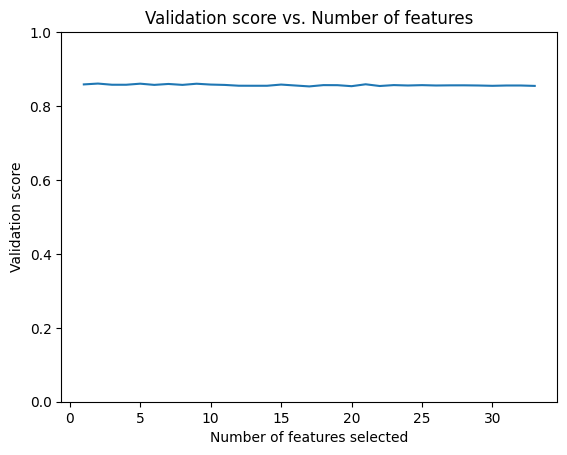

In [ ]:
# Plot the validation score graph
plt.figure()
plt.title('Validation score vs. Number of features')
plt.xlabel('Number of features selected')
plt.ylabel('Validation score')
plt.ylim((0,1))
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.show()

In [ ]:
selector.cv_results_

{'mean_test_score': array([0.85855091, 0.86081336, 0.85762849, 0.85759294, 0.8604931 ,
        0.85724487, 0.85973782, 0.85724487, 0.8603697 , 0.85809698,
        0.85714058, 0.85497214, 0.85487814, 0.85487814, 0.85809698,
        0.85558773, 0.85311063, 0.85661408, 0.85645233, 0.85373871,
        0.85886485, 0.85420246, 0.85668302, 0.85558773, 0.85654249,
        0.85558773, 0.85599541, 0.85604622, 0.85558773, 0.85472989,
        0.85558773, 0.85558773, 0.85448383]),
 'std_test_score': array([0.01248089, 0.01164078, 0.01047213, 0.01317606, 0.01168377,
        0.01347044, 0.01349554, 0.01347044, 0.01317465, 0.01468132,
        0.01557137, 0.01582849, 0.0181111 , 0.0181111 , 0.01468132,
        0.0166592 , 0.01801964, 0.01648603, 0.0178682 , 0.0189443 ,
        0.01811274, 0.0161172 , 0.01819803, 0.0166592 , 0.01560625,
        0.0166592 , 0.02066067, 0.01404956, 0.0166592 , 0.01550949,
        0.0166592 , 0.0166592 , 0.01519047]),
 'split0_test_score': array([0.84347826, 0.84347826, 0.